For this lab, you will use diamonds diamondsset from seaborn package 

1.   Check for zero entries and fix them appropriately.
2.   Generate multivariate plots for the diamonds diamondsset

3. Feature Engineering - Create a volume feature using x, y and z feature
4.   Plot correlation matrix - report your observation
5.   Pick any two feature pairs that are highly correlated and test their distrutions using normal Quantile and QQ plots to determine if the distribution is normal 
6. Also measure the kurtosis and skew of the features chosen in task 5



In [21]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Import diamonds

diamonds = sns.load_dataset('diamonds')

diamonds


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Task 1</h3>

In [3]:
(diamonds == 0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

Attribute: X
Summary:
N outside of two STD:	 1961 	( 3.64 %)
N outside of three STD:	 43 	( 0.08 %)


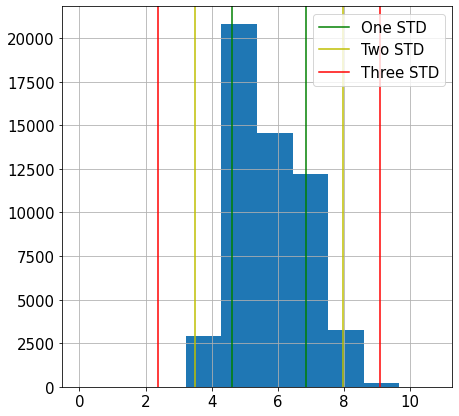

Attribute: Y
Summary:
N outside of two STD:	 1749 	( 3.24 %)
N outside of three STD:	 34 	( 0.06 %)


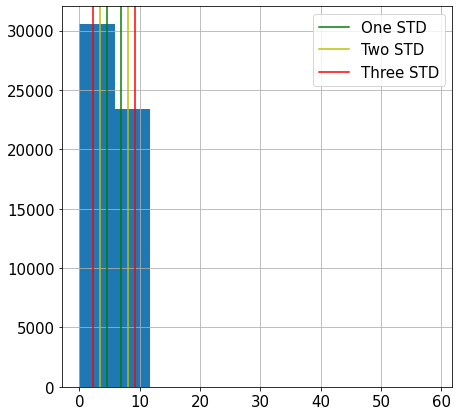

Attribute: Z
Summary:
N outside of two STD:	 1800 	( 3.34 %)
N outside of three STD:	 55 	( 0.1 %)


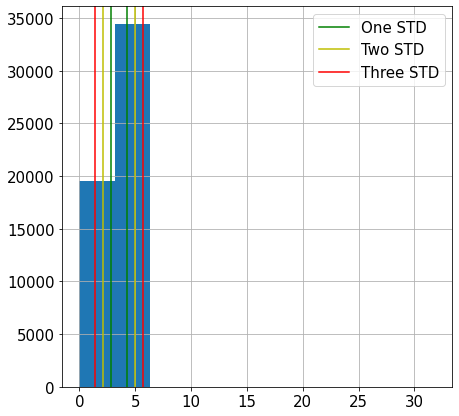

In [4]:
myAtt = ['x','y','z']

def plotAttribute(featureName):
    plt.rc('font', size=15)
    oneSTD = diamonds[featureName].std()
    twoSTD = oneSTD * 2
    threeSTD = oneSTD * 3
    meanValue = diamonds[featureName].mean()
    
    print("Attribute:", featureName.upper())
    print("Summary:")
    
    instances = diamonds.shape[0]
    outsideTwo = ((diamonds[featureName] < (meanValue - twoSTD)).sum() + (diamonds[featureName] > (meanValue + twoSTD)).sum())
    outsideThree = ((diamonds[featureName] < (meanValue - threeSTD)).sum() + (diamonds[featureName] > (meanValue + threeSTD)).sum())
    
    print("N outside of two STD:\t", outsideTwo, "\t(", round((outsideTwo/instances) *100, 2),"%)")
    print("N outside of three STD:\t", outsideThree, "\t(", round((outsideThree/instances) * 100, 2),"%)")
    
    plt.axvline(x=(meanValue - oneSTD), label='One STD', c="g")
    plt.axvline(x=(meanValue + oneSTD), c="g")
    
    plt.axvline(x=(meanValue - twoSTD), label='Two STD', c="y")
    plt.axvline(x=(meanValue + twoSTD), c="y")

    plt.axvline(x=(meanValue - threeSTD), label='Three STD', c="r")
    plt.axvline(x=(meanValue + threeSTD), c="r")
    
    diamonds[featureName].hist(figsize=(7,7))
    plt.legend()
    plt.show()
    
for attribute in myAtt:
    plotAttribute(attribute)

<p>Considering that all the 0 values are outside of 2 standard deviations, we could remove these instances from the dataset because they account for less than 5% of the population</p>

In [5]:
diamonds["x"] = diamonds["x"].mask(diamonds["x"] == 0, np.NaN)
diamonds["y"] = diamonds["y"].mask(diamonds["y"] == 0, np.NaN)
diamonds["z"] = diamonds["z"].mask(diamonds["z"] == 0, np.NaN)
diamonds.dropna(inplace=True)

In [6]:
(diamonds == 0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<h3>Task 2</h3>

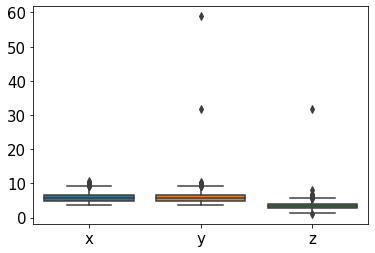

In [7]:
ax = sns.boxplot(data=diamonds[myAtt])
# ax.set_ylim(0, 12)

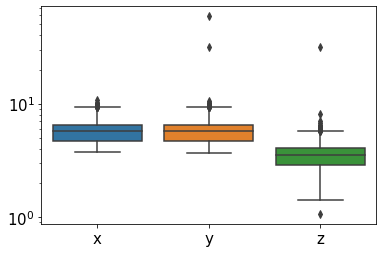

In [8]:
ax = sns.boxplot(data=diamonds[myAtt])
ax.set_yscale('log')

<p>There are very few instances with values over 12 for one or more of these attributes</p>

(40, 90)

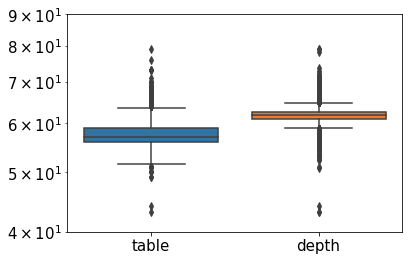

In [9]:
ax = sns.boxplot(data=diamonds[['table', 'depth']])
ax.set_yscale('log')
ax.set_ylim(40, 90)

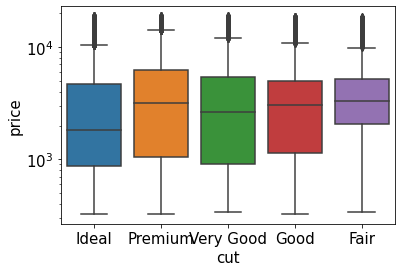

In [10]:
ax = sns.boxplot(x='cut', y='price', data=diamonds)
ax.set_yscale('log')

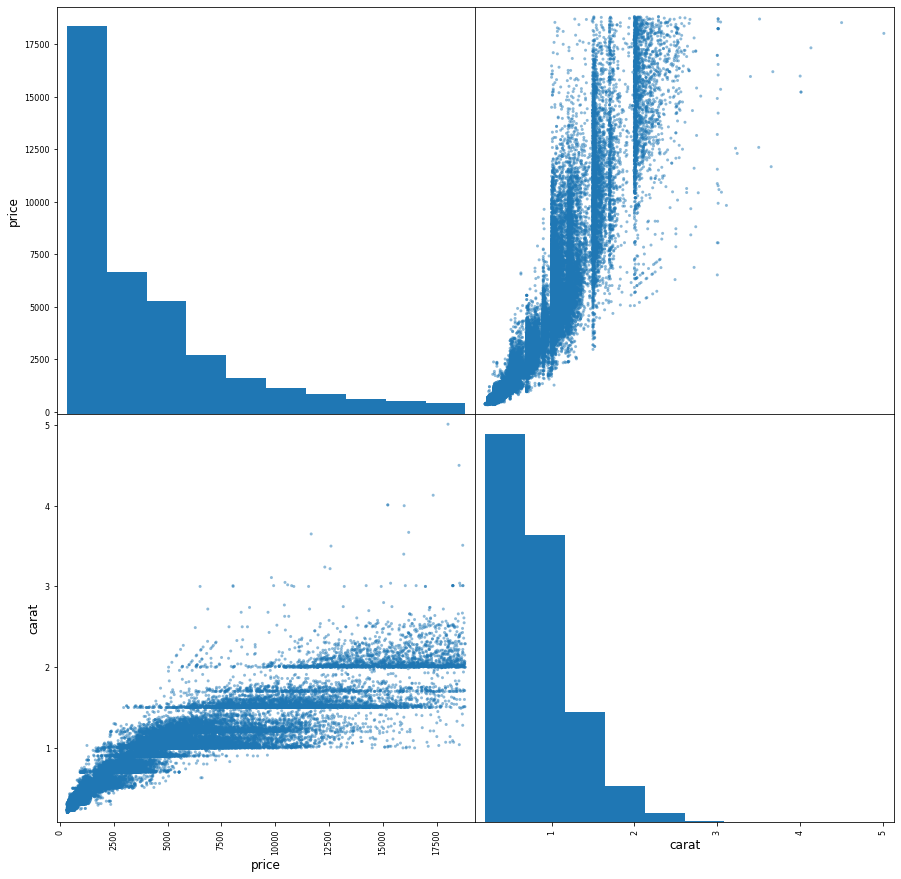

In [11]:
# Scatter Plot
plt.rc('font', size =12)
pd.plotting.scatter_matrix(diamonds[['price','carat']], figsize=(15,15))
plt.show()

<h3>Task 3</h3>

In [12]:
diamonds['volume'] = pd.Series(diamonds['x']*diamonds['y']*diamonds['z'])

In [13]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


<h3>Task 4</h3>

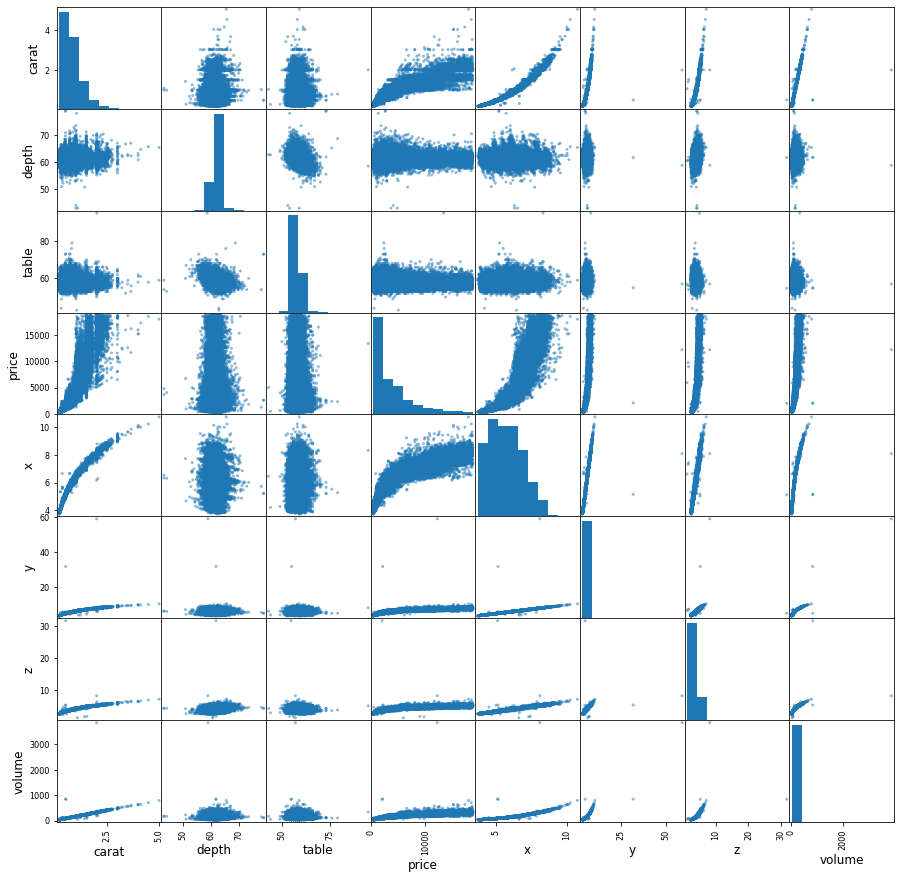

In [15]:
plt.rc('font', size =12)
pd.plotting.scatter_matrix(diamonds, figsize=(15,15))
plt.show()

In [16]:
diamonds.corr()

,carat,depth,table,price,x,y,z,volume
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048,0.978280
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023,0.009039
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483,0.167809
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206,0.904255
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435,0.958533
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744,0.977016
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000,0.951912
volume,0.978280,0.009039,0.167809,0.904255,0.958533,0.977016,0.951912,1.000000


<h3>Task 5</h3>

Text(0, 0.5, 'Carat')

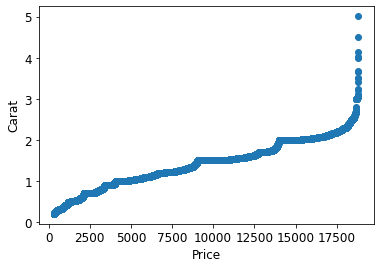

In [20]:
plt.scatter(np.sort(diamonds['price']), np.sort(diamonds['carat']))
plt.xlabel('Price')
plt.ylabel('Carat')

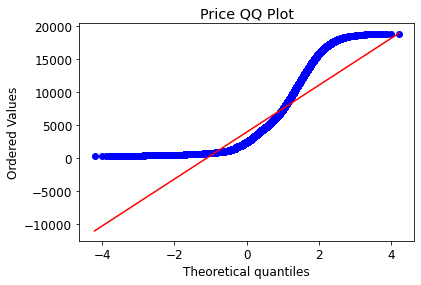

In [22]:
stats.probplot(diamonds['price'], plot=sns.mpl.pyplot)
plt.title("Price QQ Plot")
plt.show()

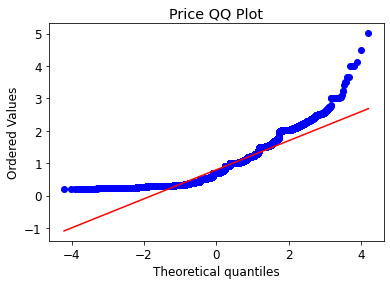

In [23]:
stats.probplot(diamonds['carat'], plot=sns.mpl.pyplot)
plt.title("Price QQ Plot")
plt.show()

<h3>Task 6</h3>

In [27]:
print('Skewness of carat and price')
print(diamonds[['carat', 'price']].skew())

print('Kurtosis of carat and price')
print(diamonds[['carat', 'price']].kurtosis())

Skewness of carat and price
carat    1.116207
price    1.618349
dtype: float64
Kurtosis of carat and price
carat    1.255240
price    2.178391
dtype: float64


(array([[53920.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.],
        [ 4915., 13242.,  5171.,  4257.,  3343.,  2651.,  2883.,  2843.,
          2122.,  1632.,  1414.,  1128.,   939.,   789.,   770.,   650.,
           585.,   596.,   476.,   433.,   433.,   380.,   356.,   292.,
           298.,   318.,   265.,   271.,   250.,   218.]]),
 array([2.00000000e-01, 6.27626667e+02, 1.25505333e+03, 1.88248000e+03,
        2.50990667e+03, 3.13733333e+03, 3.76476000e+03, 4.39218667e+03,
        5.01961333e+03, 5.64704000e+03, 6.27446667e+03, 6.90189333e+03,
        7.52932000e+03, 8.15674667e+03, 8.78417333e+03, 9.41160000e+03,
        1.00390267e+04, 1.06664533e+04, 1.12938800e+04, 1.19213067e+04,
        1.25487333e+04, 1.31761600e+04, 1.38035867e+04, 1.44310133e+04,
        1.50

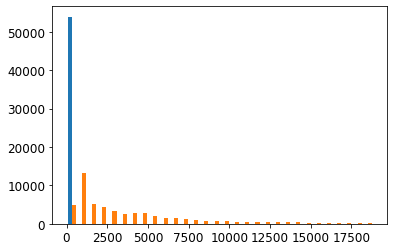

In [30]:
# diamonds[['carat','price']].hist()

plt.hist(diamonds[['carat','price']], bins=30)